###OpenCV


In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = "Model_Data/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "Model_Data/frozen_inference_graph.pb"

In [3]:
mode1 = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels = []
file_names= 'Model_Data/labels.txt'
with open(file_names, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
mode1.setInputSize(320,320)
mode1.setInputScale(1.0/127.5)
mode1.setInputMean((127.5,127,5,127.5))
mode1.setInputSwapRB(True)

< cv2.dnn.Model 00000202CC0CC730>

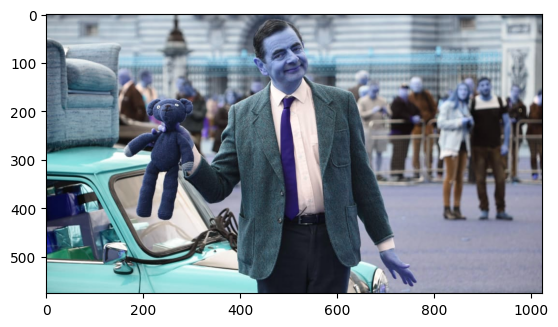

In [8]:
img = cv2.imread('img/bean.jpg')
plt.imshow(img)

In [9]:
ClassIndex, confidece , bbox = mode1.detect(img, confThreshold=0.5)

In [10]:
for i in ClassIndex:
    print(classLabels[i-1])

person
person
person
toilet
toilet
person
person
person
person


In [11]:
print(ClassIndex)

[ 1  1  1 62 62  1  1  1  1]


In [12]:

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (0, 0, 255), 2)  # Changed color to red
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)


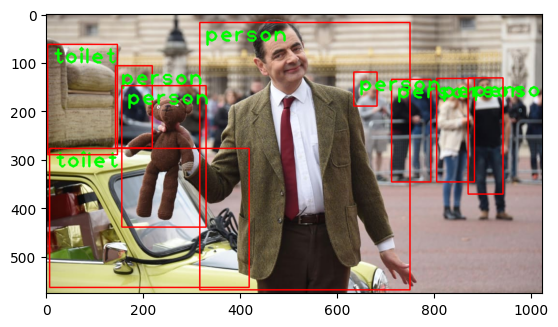

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()